# Working with google Colab

During our praticals, we will work in `google colab`, it pretty much works like a `jupyter notebook` but with the advantage that we don´t need to install `python` or `python packages` on our local machine and can start right away! 


If you want to read more about Colab, you can start here:
- [Colab FAQ](https://research.google.com/colaboratory/faq.html)


------ -

### Awesome! Let´s get started
![](https://media0.giphy.com/media/unQ3IJU2RG7DO/200w.webp?cid=ecf05e47f6mswynnu54ew49x7ciyvu7on88fjiseqmbkcw89&rid=200w.webp&ct=g)




# Introduction 

Python offers multiple modules for **data visualization**. 

For this course, we will focus on the most common and general ones:

- [matplotlib](!https://matplotlib.org/) 
- [seaborn](!https://seaborn.pydata.org/) 


# matplotlib 

- designed to provide complete control over your plots

Matplotlib (and all hig level APIs that build upon it) builds upon a specifc anatomy of a figure:

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001_2_0x.png)


Thats a lot of information, but let´s boil it down: 

- **figures**: the entire graphic on which axes, titles, legends etc. are drawn.
- **axes**: an area in which you can locate points in terms of x-y coordinates
- **axis**: providing scale for data (ticks, tick labels)
- **artist**: everything that you can see on the figure (e.g. text, lines)

        










## Getting started with `Matplotlib`

In [ ]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 
# make sure to run the second line to embedd your graphics directly in your jupyter notebook

In [ ]:
x =  np.linspace(0,20,10)# generates 20 numbers between 0 and 10 
y =  x**2             # x square 

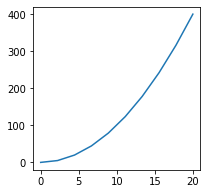

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(x,y) # creates a figure with a specific size on which we can draw
 # lineplot 

This was super easy! However, the plot misses some important to make it meaningful, such as `axes label` and a `title`. This can be easily added with matplotlibs `plt` interface.

*Note*: As stated above, `matplotlib` allows you full control over your plots, which (often) means more line of code! 

Text(0.5, 1.0, 'some title')

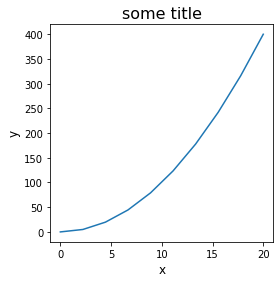

In [ ]:
plt.figure(figsize=(4,4)) 
plt.plot(x,y) #lineplot
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("some title", fontsize=16)


`Matplotlib` also allows to easily draw multiple `subplots` within one `plot` by using the `subplots` function. Graphics are can than be added via the `axes`.

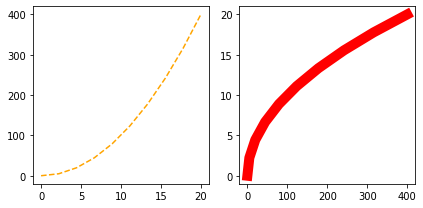

In [ ]:
 fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,3))# create subplot with 1 row and 2 cols

 axes[0].plot(x,y, linestyle="--", color="orange")#lineplot x,y
 axes[1].plot(y,x, linewidth=10, color="red")# lineplot y,x

 plt.tight_layout()#adjusts spacing between plots

Of course `matplotlib` comes with support for basically all *standard plots* such as `boxplots`,`barplots`, `histograms`, `scatterplots` ... Make sure to check [their great overview](https://matplotlib.org/stable/gallery/index.html) of whats possible! 

--------------------------------------------

# Real Data 


First we will make use of datasets provided by the seaborn package. For handling the data, we will rely on `pandas`.

![](https://media.giphy.com/media/EatwJZRUIv41G/giphy.gif) 

Oh no, not on that fluffy fellow but a python module of the same name!


If you want to learn more about pandas, check:
- [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html) 
- [pandas getting started](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)



We will cover some very basic dataframe handling in the next few lines, i.e.,
- loading data from `sns.load_datasets()`
- inspecting the dataframe with `.head()` and `.describe()`
- checking for missing values and excluding them




In [ ]:
df = sns.load_dataset("penguins")
print(df.shape) #observations x variables

(344, 7)


### Understanding the data



In [ ]:
df.head() #depicts the first 5 rows of our dataframe


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df.describe() #summarizes all numeric columns (central tendency, distribution, dispersion)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df.isnull().sum(axis=0) # checking for missing values in columns (ie variables)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Usually it´s up to you as a researcher how to handle missing data. The most common things to do with missing data is `imputation` or `dropping NaNs`. For now, we will just drop every row that has at least one missing data point (ie `NaN`).

In [ ]:
df_clean = df.dropna(axis="index", how="any", inplace=False) #dropping rows that contain >= 1 missing value 
df_clean.isnull().sum() #sanity check

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Lets investigate whether there might be any interesting relationships between our variables. To get a first (non-visual) impression of the relatedness of our variables, we can compute pairwise correlations between columns using `df.corr()`. Note: This might not be suitable with larger dataframes!

In [ ]:
df_clean.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


Now that we have our data at hand, lets try to plot the relationship between
`body_mass` and `flipper_length` as a scatterplot using `matplotlib`.

Text(0, 0.5, 'flipper_length')

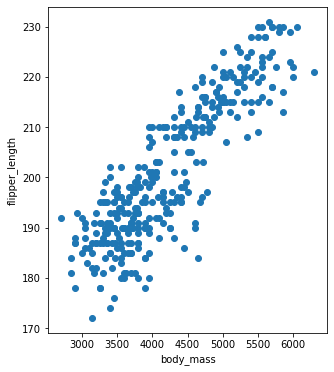

In [ ]:
plt.figure(figsize=(5,6))

plt.scatter(x=df_clean["body_mass_g"], y=df_clean["flipper_length_mm"])
plt.xlabel("body_mass")
plt.ylabel("flipper_length")

# seaborn 

easy generation of plots with less lines of code (vs. `matplotlib`)

- various [styles](https://seaborn.pydata.org/tutorial/aesthetics.html) and [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
- wide range of supported plots 
- good starting point for exploring and visualizing your data 




Lets try to recreate the `scatterplot` from above using `seaborn`.

Hint: 
- using e.g. `sns.scatterplot?` in a code cell will show the functions documentation with all parameters etc
- use [stackoverflow](https://stackoverflow.com/) to find answers to literally all coding-related questions you might have, e.g., if you want to find out, how you could change the size of the markers used in `sns.scatterplot`, [here](https://stackoverflow.com/questions/52785101/seaborn-scatterplot-marker-size-for-all-markers) people already got you covered.
- check the [python graph gallery](https://www.python-graph-gallery.com/) to see what kind of plots you could make
- check the [seaborn tutorial page](https://seaborn.pydata.org/tutorial.html) to get started

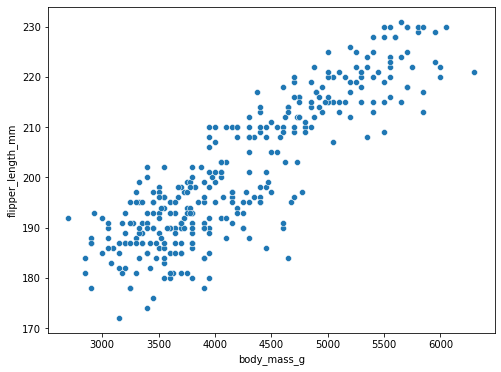

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=df_clean)

Now lets try to add `species` as a third varible into our `scatterplot` to visualize whether there might be some *between-species* differences in the association between *body_mass* and *flipper_length*

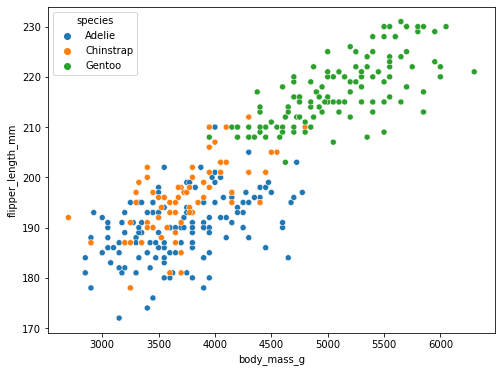

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species", data=df_clean)

From this plot we can see that the `Gentoo` penguins appear to have higher values on our variables of interest. However, from the `scatterplot` we can´t really answer the question whether the association between `body_mass` and `flipper_length` varies as a function of `species`. 


Lets try to use 'sns.lmplot' ([documentation](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to plot the same association as above, but now for each `specie` and with `sex` overlayed. Additionally try to change the `color` and use different `markers` for male and female penguins.

<Figure size 360x360 with 0 Axes>

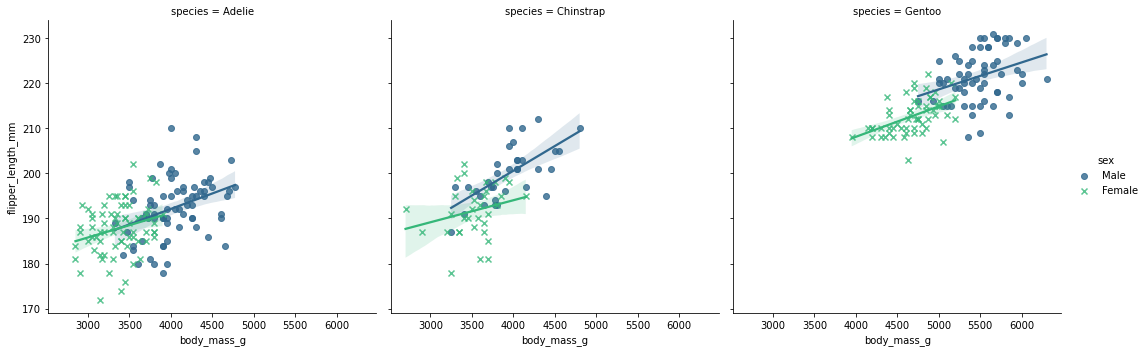

In [ ]:
plt.figure(figsize=(5,5))
sns.lmplot(x="body_mass_g", y="flipper_length_mm", col="species", 
           hue="sex", data=df_clean, palette="viridis", markers=["o", "x"])


# Uploading file to colab

In [ ]:
from google.colab import files
files.upload() ## upload the mistery.csv 

Saving mistery.csv to mistery.csv


{'mistery.csv': b',subject,timepoint,event,region,signal\n0,s13,18,stim,parietal,-0.017551581538\n1,s5,14,stim,parietal,-0.0808829319505\n2,s12,18,stim,parietal,-0.0810330187333\n3,s11,18,stim,parietal,-0.04613439017519999\n4,s10,18,stim,parietal,-0.037970203264199996\n5,s9,18,stim,parietal,-0.10351309616\n6,s8,18,stim,parietal,-0.0644081947232\n7,s7,18,stim,parietal,-0.0605262017124\n8,s6,18,stim,parietal,-0.00702856091007\n9,s5,18,stim,parietal,-0.0405568546157\n10,s4,18,stim,parietal,-0.04881219994659999\n11,s3,18,stim,parietal,-0.0471481458275\n12,s2,18,stim,parietal,-0.08662295949179999\n13,s1,18,stim,parietal,-0.046659046163800004\n14,s0,18,stim,parietal,-0.0755699759477\n15,s13,17,stim,parietal,-0.00826462526111\n16,s12,17,stim,parietal,-0.08851175012250001\n17,s7,9,stim,parietal,0.058896545296999996\n18,s10,17,stim,parietal,-0.016846516627\n19,s9,17,stim,parietal,-0.12157375579000004\n20,s8,17,stim,parietal,-0.0762871207962\n21,s7,17,stim,parietal,-0.043812021381900004\n22,s6,1

Reading different datatables with `pandas` can be done by using one of the functions [here](https://pandas.pydata.org/docs/reference/io.html). One of the most common usecases would be `pandas.read_csv()`, see below for some basic functionality.

In [ ]:
import os # import operating system
os.listdir() #get list of files in current directory

# load the data and read it into a dataframe
mistery = pd.read_csv("mistery.csv", sep=",", index_col=[0])
mistery.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


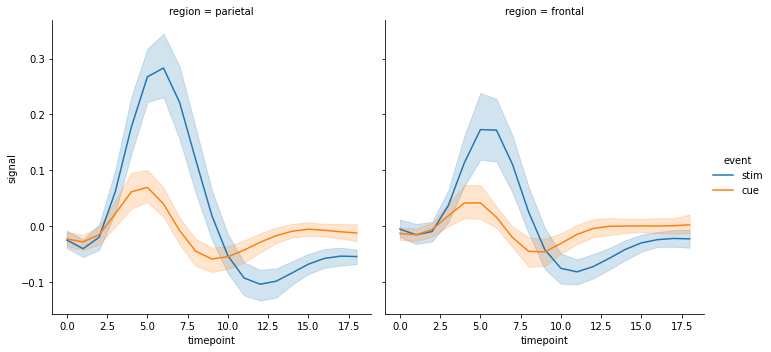

In [ ]:
# try to figure out what kind of data you have 
# hint: use sns.relplot in a similar way as sns.lmplot before 
sns.relplot(
    data=mistery, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event")



# eigene daten sollten anonymisiert sein 
# data are uploaded to google - make sure that everything is in accordance with your 
# protection of data privacy 
